In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib as mpl
import seaborn as sns 
import cmasher as cmr

In [26]:
dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch"
#file="MAG2P_nbonded-2025-2-6-16:25:37.pickle"
file="MAG2P_nbonded-2025-2-6-21:44:50.pickle"
df = pd.read_pickle("{}/{}".format(dir,file))
df = df.sort_values(["lambda","shift"])   
bonds = df.groupby(["lambda","shift"])[["mean_bonds", "std_bonds"]].mean().reset_index().values.astype(float) 

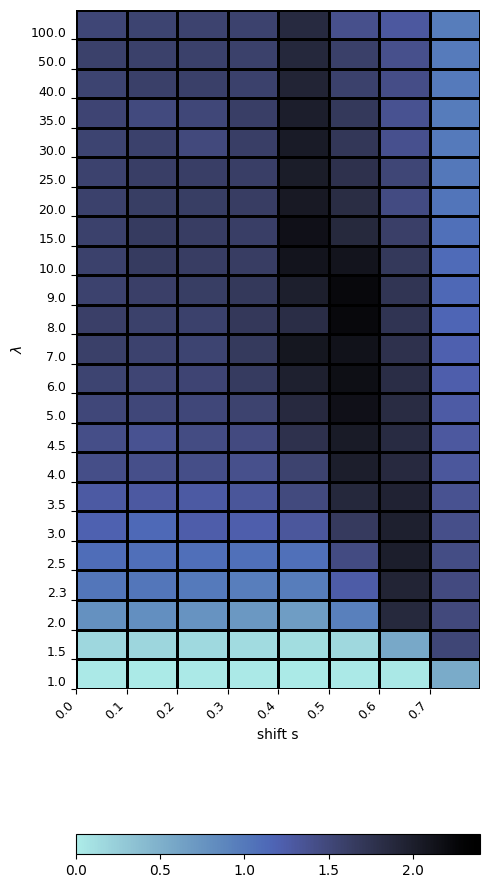

In [34]:

shifts = df["shift"].unique()
lambdas=  df["lambda"].unique()
arr = np.reshape(bonds[:,2], (len(lambdas), len(shifts)))
arr = np.round(arr, decimals=2)

mpl.rc("legend", fontsize=50)
fig, ax = plt.subplots(figsize=(5,10))
im = sns.heatmap(
    arr,
    ax=ax,
    linewidth=1,
    annot=False,
    cmap=cmr.sapphire_r,
    vmin=0,
    vmax=2.4,
    cbar=False,
    linecolor="black"
)
im.invert_yaxis()
new_xticks = shifts
new_yticks = lambdas
ax.set_xticks(
    np.arange(0, len(shifts)),
    new_xticks,
    rotation=45,
    horizontalalignment="right",
)
ax.set_yticks(
    np.arange(0, len(lambdas)),
    new_yticks,
    rotation=0,
    verticalalignment="bottom",
)
im.set_ylabel("$\lambda$", size=10)
im.set_xlabel("shift s", size=10)
im.set_yticks(np.arange(0, len(lambdas)), new_yticks)
im.tick_params(axis="both", which="major", labelsize=9)
plt.tight_layout()

mappable = im.get_children()[0]
#plt.colorbar(mappable, ax=axes, orientation="horizontal")
plt.colorbar(mappable, ax=ax, orientation="horizontal")
plt.tight_layout()
plt.show()